In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/HP/Dropbox/My PC (LAPTOP-S7638K91)/Desktop/Credit_card_fraud_detection/PS_20174392719_1491204439457_log.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Data Visulisation

In [8]:
data["isFraud"] = data["isFraud"].astype(int)
data["isFlaggedFraud"] = data["isFlaggedFraud"].astype(int)
data["step"] = data["step"].astype(int)

In [9]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 3
Float variables: 5


<AxesSubplot:xlabel='type', ylabel='count'>

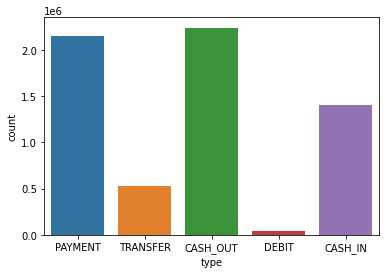

In [27]:
sns.countplot(x = 'type', data = data)

<AxesSubplot:xlabel='type', ylabel='amount'>

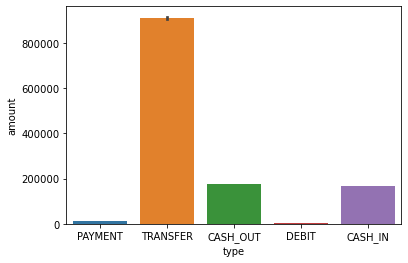

In [28]:
sns.barplot(x='type', y='amount', data=data)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

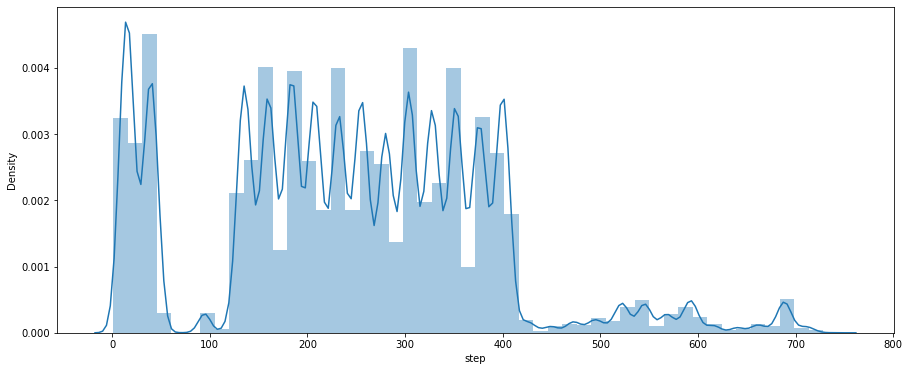

In [29]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

<AxesSubplot:>

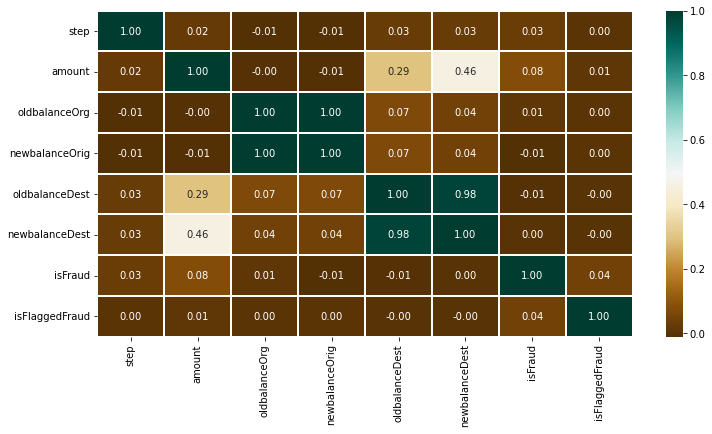

In [40]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

In [10]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [11]:
data_new['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [45]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest','isFlaggedFraud'], axis=1)
y = data_new['isFraud']

In [39]:
from collections import Counter
from imblearn.over_sampling import SMOTENC
categorical_features = [6,7,8,9]

print("Original dataset shape:", Counter(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTENC to balance the dataset
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

print("Resampled dataset shape:", Counter(y_resampled))

Original dataset shape: Counter({0: 6354407, 1: 8213})
Resampled dataset shape: Counter({0: 4448056, 1: 4448056})


In [59]:
!pip install xgboost

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = [LogisticRegression(), XGBClassifier(),
          SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]
 
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
     
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))
     
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

In [42]:
rf_classifier = RandomForestClassifier(n_estimators=7,criterion='entropy', random_state=7)
rf_classifier.fit(X_resampled, y_resampled)
train_preds = rf_classifier.predict_proba(X_resampled)[: , 1]
print('Training Accuracy : ', ras(y_resampled, train_preds))
y_preds = rf_classifier.predict_proba(X_test)[:,1]
print('Validation Accuracy : ', ras(y_test, y_preds))

Training Accuracy :  0.9999999983999153
Validation Accuracy :  0.9961524902251601


In [43]:
xgb_class = XGBClassifier().fit(X_resampled, y_resampled)
train_preds = xgb_class.predict_proba(X_resampled)[:,1]
print('Training Accuracy : ', ras(y_resampled, train_preds))
y_preds = xgb_class.predict_proba(X_test)[:, 1]
print('Validation Accuracy : ', ras(y_test, y_preds))

Training Accuracy :  0.9999765207818301
Validation Accuracy :  0.9978748462839717


In [44]:
logistic_class = LogisticRegression(solver='liblinear')
logistic_class.fit(X_resampled, y_resampled)
train_preds = logistic_class.predict_proba(X_resampled)[: , 1]
print('Training Accuracy : ', ras( y_resampled, train_preds))
y_preds = logistic_class.predict_proba(X_test)[:,1]
print('Validation Accuracy : ', ras(y_test, y_preds))

Training Accuracy :  0.9727988029295436
Validation Accuracy :  0.965395101987942


In [45]:
y_predict = xgb_class.predict(X_test)
Results = pd.DataFrame({'A':y_test,'P':y_predict})
Results.head(10)

,A,P
3737323,0,0
264914,0,0
85647,0,0
5899326,0,0
2544263,0,0
3494160,0,0
2331654,0,0
1414955,0,0
2938135,0,0
6133806,0,0


In [47]:
y_test_proba = xgb_class.predict_proba(X_test)
print(y_test_proba.shape)

(1908786, 2)


In [48]:
y_test_proba[0:5,:]

array([[9.9999994e-01, 6.9964294e-08],
       [9.9999946e-01, 5.2994409e-07],
       [9.9999952e-01, 4.7014922e-07],
       [1.0000000e+00, 1.6831996e-19],
       [9.9999899e-01, 1.0222215e-06]], dtype=float32)

In [49]:
import numpy as np

# Given array in scientific notation
array_in_scientific = y_test_proba[0:5,:]

# Convert to normal number format
array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)

print(array_in_normal)

[['0.9999999403953552' '0.0000000699642939']
 ['0.9999994635581970' '0.0000005299440886']
 ['0.9999995231628418' '0.0000004701492173']
 ['1.0000000000000000' '0.0000000000000000']
 ['0.9999989867210388' '0.0000010222214541']]


In [50]:
T = y_test_proba[:,1]
array_in_one = T

# Convert to normal number format
S = np.vectorize(lambda x: format(x, '.16f'))(array_in_one)

print(S)

['0.0000000699642939' '0.0000005299440886' '0.0000004701492173' ...
 '0.0000007639494015' '0.0000000000000000' '0.0000001828787219']


In [53]:
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_predict,'Prob(Class = 1)':S})

print(Results.head(10))

         Actual  Predictions     Prob(Class = 1)
3737323       0            0  0.0000000699642939
264914        0            0  0.0000005299440886
85647         0            0  0.0000004701492173
5899326       0            0  0.0000000000000000
2544263       0            0  0.0000010222214541
3494160       0            0  0.0000000000000339
2331654       0            0  0.0000012275268091
1414955       0            0  0.0000006848403586
2938135       0            0  0.0000000000000243
6133806       0            0  0.0000000001546425


In [54]:
#Generate the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)
print(cm)

[[1902860    3491]
 [     21    2414]]


Text(69.0, 0.5, 'True Label')

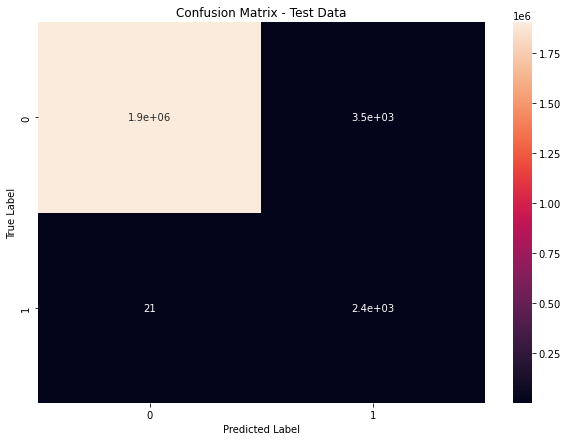

In [55]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

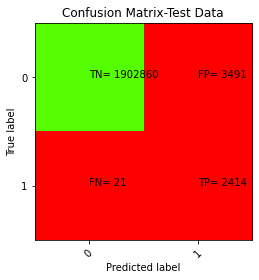

In [56]:
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.prism)
classNames = ['0','1']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"= "+str(cm[i][j]))
plt.show()

In [57]:
#Calculate common error metrics for a 2-class classifier

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.41      0.99      0.58      2435

    accuracy                           1.00   1908786
   macro avg       0.70      0.99      0.79   1908786
weighted avg       1.00      1.00      1.00   1908786

